# Logistic Regression from Scratch: An Immersion to Machine Learning Concepts

**Dimitrios Tanoglidis**

This is the first of a series of notebooks on basic Machine Learning algorithms, written (when relatively easy) from scratch. That means that I will try to avoid using the [scikit-learn](https://scikit-learn.org/stable/) library, at least not before writing my own functions first. 

The reason for writing these notebooks is the same as the reason one teaches a class: to learn the material themselves. That being said, I hope that other people will find them useful, too. 


The first algorithm I am going to present is the logistic regression classifier (yes, although it has the name "regression", it is a classifier). The reason for selecting LR as the first classifier to present is that:

- a) It is intuitive 

- b) Often works "just fine" for practical applications (useful skill for industry-oriented people) 

-  c) Can be easily coded from scratch

-  d) It is (usually) the last layer of a deep neural network

- e) Allow us to introduce concepts such as regularization, and selection of hyperparameters

- f) Allow us to nicely introduce and hard-code the loss function and its optimization methods 

- g) and many more!!!




Before discussing the model, let's import all the necessary packages we are going to need.




In [ ]:
import numpy as np 
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import pandas as pd
#import seaborn as sns
rcParams['font.family'] = 'serif'

# Adjust rc parameters to make plots pretty
def plot_pretty(dpi=200, fontsize=9):
    
    import matplotlib.pyplot as plt

    plt.rc("savefig", dpi=dpi)       # dpi resolution of saved image files
    plt.rc('text', usetex=True)      # use LaTeX to process labels
    plt.rc('font', size=fontsize)    # fontsize
    plt.rc('xtick', direction='in')  # make axes ticks point inward
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=10) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=10) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [0.5, 1.1]) # fix dotted lines

    return

plot_pretty()


If you run this notebook on Colab, uncomment and run the following cell

In [ ]:
#! sudo apt-get install texlive-latex-recommended 
#! sudo apt install texlive-latex-extra
#! sudo apt install dvipng
#!apt install cm-super

## Logistic Regression for binary classification

LR is a **supervised** machine learning classifier. We will consider a binary classification problem. Assume that we have $m$ training pairs $(\mathbf{x}^{(i)},y^{(i)})$, where $\mathbf{x}^{(i)} = [x_1^{(i)},x_1^{(i)},\dots,x_n^{(i)}]$ a feature vector and the labels $y^{(i)} \in \{0,1\}$, the probability to get $y=1$ is modeled as:


\begin{equation}\boxed{
p(y=1|\mathbf{x};\mathbf{w}) = \frac{1}{1+e^{-\mathbf{w}^T\mathbf{x}}},}
\end{equation}

where $\mathbf{w}^T\mathbf{x} = \sum_{i=0}^n w_i x_i = w_0 + w_1 x_1 + \dots + w_n x_n $.

The parameters $w$ are **weights to be learned**. Specifically the paramter $w_0$ is called **bias**.

The property that makes the logistic function (also known as **sigmoid**) $\sigma(z) = 1/(1+e^{-z})$ useful is that it can take number (here $\mathbf{w}^T\mathbf{x}$) and map it to the interval $(0,1)$, thus making it easy to be interpreted as probability.

Let's plot the logistic function in a range of $z$ values:


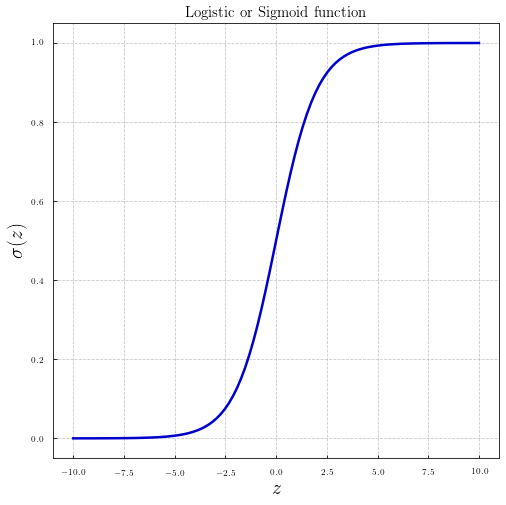

In [ ]:
def logist(z):
  g = 1. + np.exp(-z)
  return 1./g


z = np.linspace(-10,10,100)
logist_z = logist(z)


plt.figure(figsize = (8.0,8.0))
plt.plot(z,logist_z,c='mediumblue',linewidth=2.5)
plt.grid(ls='--',alpha=0.7)
plt.title('Logistic or Sigmoid function', fontsize=15)
plt.xlabel('$z$',fontsize=20)
plt.ylabel('$\sigma(z)$', fontsize=20)

plt.show()


### Learning the weights: An introduction to the loss function and the gradient descent

If we find optimal weights, $w$, then the predicted label of a single observation, $\hat{y}$, will be:


\begin{equation}
\hat{y} = \begin{cases} 
1, & \mbox{if}\,\, \sigma(\mathbf{w^Tx}) \geq 0.5 \\ 
0, & \mbox{otherwise}
\end{cases}
\end{equation}

How are we going to find the weights? 

Since we are dealing with a binary problem, labels $Y \in \{0,1\}$ the probability to get label $y$ when we have an observation $\mathbf{x}$ is given by the **Bernoulli distribution**:


\begin{equation}
p(y|\mathbf{x};\mathbf{w}) \\= p(y=1|\mathbf{x};\mathbf{w})^y (1- p(y=1|\mathbf{x};\mathbf{w}))^{(1-y)}  \\=\sigma(\mathbf{w^Tx})^y (1 - \sigma(\mathbf{w^Tx}))^{(1-y)}
\end{equation}

Assuming that the $m$ training samples are independent, we can write down a **likelihood** of parameters given observations, whose **maximization** will yield the best set  of parameters:

\begin{equation}
L(\mathbf{w}|\mathbf{x},\mathbf{y}) = \prod_{i=1}^m p(y^{(i)}|\mathbf{x}^{(i)};\mathbf{w}) \\ = \prod_{i=1}^m \sigma(\mathbf{w^Tx}^{(i)})^{y^{(i)}} (1 - \sigma(\mathbf{w^Tx}^{(i)}))^{(1-y^{(i)})}
\end{equation}

Now to form the **loss function** (something to be **minimized**) we will get the *negative* of the the log of the above likelihood (the logarithm is for computational ease):

\begin{equation}
\boxed{
J(\mathbf{w}) = - \sum_{i=1}^m y^{(i)}\log \sigma(\mathbf{w^Tx}^{(i)}) + (1-y^{(i)})\log (1 - \sigma(\mathbf{w^Tx}^{(i)}))}
\end{equation}


This is also known as the **binary cross-entropy** loss function.


## References